In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(palette="colorblind")
sns.set_style("white", {'axes.grid': False})

from icecream import ic
import matplotlib
from matplotlib.ticker import MultipleLocator

# matplotlib.rcParams["text.usetex"] = True
matplotlib.rcParams["font.family"] = "serif"
matplotlib.rcParams["font.size"] = "12"

In [2]:
# Default date ranges
from datetime import datetime

import pytz


DEFAULT_DATE_RANGES = (
    ('2019-05-01', '2019-08-31'),
    ('2019-09-01', '2019-12-31'),
    ('2020-02-01', '2020-05-31'),
    ('2021-05-01', '2021-08-31'),
)

# Mapping between name of default period to dates
DEFAULT_PERIOD_TO_RANGE = {
    'Summer 2019':         DEFAULT_DATE_RANGES[0],
    'Pre-COVID-19 Summer': DEFAULT_DATE_RANGES[0],
    'Fall 2019':           DEFAULT_DATE_RANGES[1],
    'Pre-COVID-19 Fall':   DEFAULT_DATE_RANGES[1],
    'Spring 2020':         DEFAULT_DATE_RANGES[2],
    'In-COVID-19':         DEFAULT_DATE_RANGES[2],
    'Summer 2021':         DEFAULT_DATE_RANGES[3],
    'Post-COVID-19':       DEFAULT_DATE_RANGES[3],
}

timezone = pytz.timezone('America/Los_Angeles')
spring2018 = (datetime(2018, 1, 1, tzinfo=timezone), datetime(2018, 4, 30, tzinfo=timezone))
summer2018 = (datetime(2018, 5, 1, tzinfo=timezone), datetime(2018, 8, 31, tzinfo=timezone))
fall2018 = (datetime(2018, 9, 1, tzinfo=timezone), datetime(2018, 12, 31, tzinfo=timezone))
spring2019 = (datetime(2019, 1, 1, tzinfo=timezone), datetime(2019, 4, 30, tzinfo=timezone))
summer2019 = (datetime(2019, 5, 1, tzinfo=timezone), datetime(2019, 8, 31, tzinfo=timezone))
fall2019 = (datetime(2019, 9, 1, tzinfo=timezone), datetime(2019, 12, 31, tzinfo=timezone))
spring2020 = (datetime(2020, 1, 1, tzinfo=timezone), datetime(2020, 4, 30, tzinfo=timezone))
summer2020 = (datetime(2020, 5, 1, tzinfo=timezone), datetime(2020, 8, 31, tzinfo=timezone))
fall2020 = (datetime(2020, 9, 1, tzinfo=timezone), datetime(2020, 12, 31, tzinfo=timezone))
spring2021 = (datetime(2021, 1, 1, tzinfo=timezone), datetime(2020, 4, 30, tzinfo=timezone))
summer2021 = (datetime(2021, 5, 1, tzinfo=timezone), datetime(2021, 8, 31, tzinfo=timezone))
fall2021= (datetime(2021, 9, 1, tzinfo=timezone), datetime(2021, 12, 31, tzinfo=timezone))

In [3]:
from gymportal.data import extract_training_data
from src.utils import get_data


def get_train(period):
    data = get_data('caltech', "DEMO_TOKEN", drop_columns=(), start=period[0], end=period[1])
    # data = data.dropna(subset=["userInputs"])
    data = data[data.connectionTime.dt.day == data.disconnectTime.dt.day]

    return data, extract_training_data(data)

In [4]:
full = (datetime(2018, 3, 25, tzinfo=timezone), datetime(2021, 9, 13, tzinfo=timezone))
# triple = (datetime(2018, 3, 25, tzinfo=timezone), datetime(2020, 5, 31, tzinfo=timezone))
my_pick = (datetime(2019, 2, 1, tzinfo=timezone), datetime(2020, 5, 31, tzinfo=timezone))
# get_data('caltech', "DEMO_TOKEN", drop_columns=(), start=full[0], end=full[1])

In [5]:
df, _ = get_train(fall2020)
df.connectionTime

0     2020-11-18 13:37:02-08:00
1     2020-11-18 15:36:26-08:00
2     2020-11-18 16:35:54-08:00
3     2020-11-18 17:34:02-08:00
4     2020-11-18 18:07:56-08:00
                 ...           
258   2020-12-29 22:35:39-08:00
259   2020-12-30 10:17:31-08:00
260   2020-12-30 11:32:38-08:00
261   2020-12-30 14:09:41-08:00
262   2020-12-30 15:02:11-08:00
Name: connectionTime, Length: 256, dtype: datetime64[ns, America/Los_Angeles]

In [6]:
seasons = {
    "spring2018": spring2018,
    "summer2018": summer2018,
    "fall2018": fall2018,
    "spring2019": spring2019,
    "summer2019": summer2019,
    "fall2019": fall2019,
    "spring2020": spring2020,
    "summer2020": summer2020,
    "fall2020": fall2020,
    # "spring2021": spring2021,
    "summer2021": summer2021,
    "fall2021": fall2021,
}

In [7]:
from copy import deepcopy

s_to_long = 0
s_ok = 0

for k,v in seasons.items():
    try:
        df = get_data('caltech', "DEMO_TOKEN", drop_columns=(), start=v[0], end=v[1])
        stay_to_long = df[df.connectionTime.dt.day != df.disconnectTime.dt.day].connectionTime.count()
        stay_ok = df[df.connectionTime.dt.day == df.disconnectTime.dt.day].connectionTime.count()
        print(f"{k}: {stay_ok} - {stay_to_long}")
        
        s_to_long += stay_to_long
        s_ok += stay_ok
        
    except Exception:
        print(k)
        
print(f"too long: {s_to_long}; ok: {s_ok}; total: {s_to_long + s_ok}")

spring2018: 195 - 22
summer2018: 7242 - 767
fall2018: 6408 - 506
spring2019: 3614 - 251
summer2019: 3346 - 172
fall2019: 3069 - 101
spring2020: 2018 - 56
summer2020: 119 - 9
fall2020: 256 - 7
summer2021: 1765 - 43
fall2021: 287 - 3
too long: 1937; ok: 28319; total: 30256


In [8]:
# data = {
#     # "spring2018": get_train(spring2018), # !Note!: spring2018 is not fully available in the data, that only starts in march!
#     "summer2018": get_train(summer2018),
#     "fall2018": get_train(fall2018),
#     "spring2019": get_train(spring2019),
#     "summer2019": get_train(summer2019),
#     "fall2019": get_train(fall2019),
#     "spring2020": get_train(spring2020),
#     "summer2020": get_train(summer2020),
#     "fall2020": get_train(fall2020),
#     "spring2021": get_train(spring2021),
#     "summer2021": get_train(summer2021),
#     "spring2019 to spring2020": get_train(my_pick),
#     "full": get_train(full),
# }

# # data

data = {
    k: get_train(v) for k, v in seasons.items()
} | {
    "spring2019 to spring2020": get_train(my_pick),
    "full": get_train(full),
}

# remove incomplete seasons
del data["spring2018"]
del data["fall2021"]

In [9]:
for train_season, (_, X) in data.items():
    print(f"{train_season}:{X.shape}")

summer2018:(7242, 3)
fall2018:(6408, 3)
spring2019:(3614, 3)
summer2019:(3346, 3)
fall2019:(3069, 3)
spring2020:(2018, 3)
summer2020:(119, 3)
fall2020:(256, 3)
summer2021:(1765, 3)
spring2019 to spring2020:(11200, 3)
full:(29411, 3)


In [10]:
# fig = plt.figure(figsize=(10, 10))
# for i, (key, X_train) in enumerate(data.items(), start=1):
#     ax = fig.add_subplot(2, 2, i, projection='3d')
#     ax.set_title(key)
#     ax.set_xlabel("arrival")
#     ax.set_ylabel("duration")
#     ax.set_zlabel("demand")

#     ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], alpha=0.1)

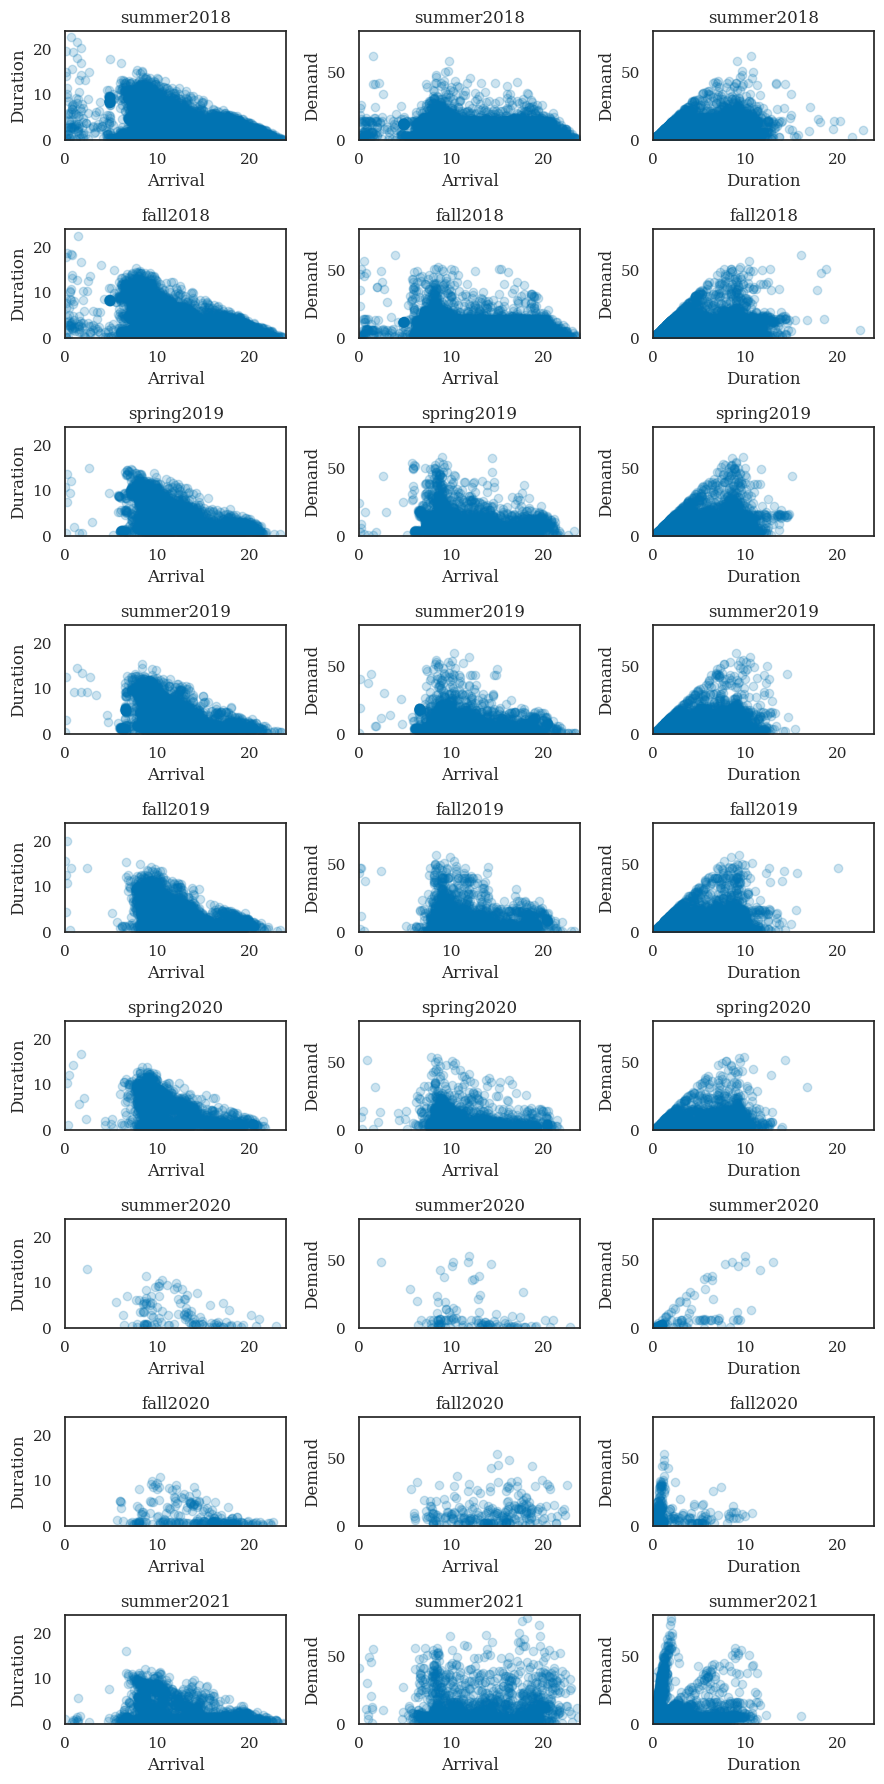

In [11]:
from copy import deepcopy

d = deepcopy(data)
del d["spring2019 to spring2020"]
del d["full"]

m = 9
fig = plt.figure(figsize=(1 * m, 2 * m), tight_layout=True)
n_rows = len(d.items())

i = 1
for idx, (train_season, (_, X_train)) in enumerate(d.items()):
    is_last_row = (idx == n_rows - 1)
    
    ax = fig.add_subplot(n_rows, 3, i)
    ax.set_title(train_season)
    ax.set_xlabel("Arrival")
    ax.set_ylabel("Duration")
    ax.set_xlim((0, 24))
    ax.set_ylim(0, 24)
    ax.scatter(X_train[:, 0], X_train[:, 1], alpha=0.2)

    ax = fig.add_subplot(n_rows, 3, i + 1)
    ax.set_title(train_season)
    ax.set_xlabel("Arrival")
    ax.set_ylabel("Demand")
    ax.set_xlim((0, 24))
    ax.set_ylim((0, 80))
    ax.scatter(X_train[:, 0], X_train[:, 2], alpha=0.2)

    ax = fig.add_subplot(n_rows, 3, i + 2)
    ax.set_title(train_season)
    ax.set_xlabel("Duration")
    ax.set_ylabel("Demand")
    ax.set_xlim((0, 24))
    ax.set_ylim((0, 80))
    ax.scatter(X_train[:, 1], X_train[:, 2], alpha=0.2)

    i += 3
    
fig.savefig("scatter.pdf", dpi=300, bbox_inches = "tight")

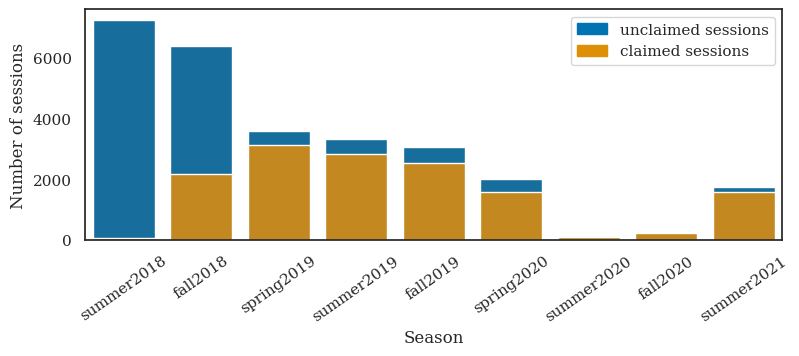

In [12]:
from copy import deepcopy
import matplotlib.patches as mpatches

m = 3
plt.figure(figsize=(3 * m, 1 * m))

d = deepcopy(data)
del d["spring2019 to spring2020"]
del d["full"]

bar1 = sns.barplot(x=d.keys(), y=[len(df) for (df, X) in d.values()])

# df.userInputs == df.userInputs works for filtering "df.userInputs == NaN" because NaN != NaN; whereas df.userInputs != NaN would be True for all rows
bar2 = sns.barplot(x=d.keys(), y=[len(
    df[df.userInputs == df.userInputs]) for (df, X) in d.values()])

current_palette = sns.color_palette()
top_bar = mpatches.Patch(label='unclaimed sessions', color=current_palette[0])
bottom_bar = mpatches.Patch(label='claimed sessions', color=current_palette[1])
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.xticks(rotation=35)
plt.xlabel("Season")
plt.ylabel("Number of sessions")

plt.savefig("bar.pdf", dpi=300, bbox_inches="tight")
plt.show()

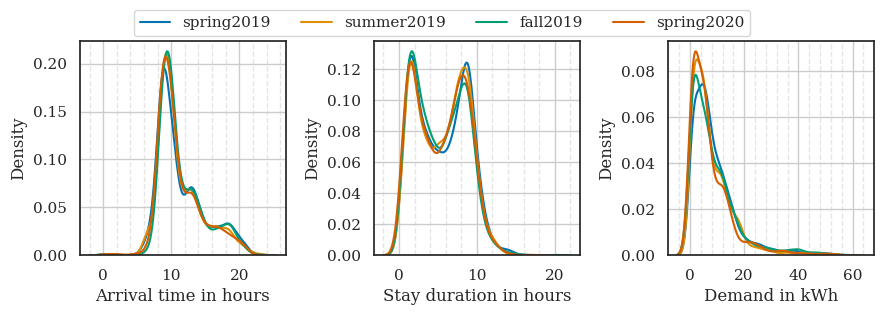

In [13]:
m = 3
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(
    3 * m, 1 * m), tight_layout=True)

for i, feature in enumerate(["Arrival time in hours", "Stay duration in hours", "Demand in kWh"]):
    ax = axes[i]
    for season, (_, X) in data.items():
        if season == "full" or season == "spring2019 to spring2020" or not ("2019" in season or "spring2020" in season):
            continue

        sns.kdeplot(X[:, i], label=season, fill=False, ax=ax, alpha=1)

    ax.set_xlabel(feature)
    ax.set_ylabel("Density")
    # ax.legend()

    major_locator: matplotlib.ticker.AutoLocator = ax.xaxis.get_major_locator()
    major_ticks = major_locator()
    x = major_ticks[1] - major_ticks[0] / 5
    ax.xaxis.set_minor_locator(MultipleLocator(x))

    ax.grid(True)
    # Enable grid on minor ticks only (which are at every integer)
    ax.grid(True, which='minor', axis='x',
            linestyle='--', color='gray', alpha=0.2)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc="center", ncols=4, bbox_to_anchor=(0.5, 1))
fig.savefig("kde.pdf", dpi=300, bbox_inches = "tight")

In [14]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.mixture import BayesianGaussianMixture, GaussianMixture

from src.utils import ManualMaxScaler


def get_gmm(X_train):
    # scaler = StandardScaler()
    scaler = ManualMaxScaler([24, 24, 80])
    X_train = scaler.fit_transform(X_train)

    gmm = BayesianGaussianMixture(n_components=50, n_init=20, max_iter=1000)

    gmm.fit(X_train)
    return gmm, scaler

In [15]:
import pickle

try:
    with open("gmms.pkl", "rb") as f:
        gmms = pickle.load(f)
except FileNotFoundError:
    gmms = {
        key: get_gmm(X_train) for key, (_, X_train) in data.items()
    }
    with open("gmms.pkl", "wb") as f:
        pickle.dump(gmms, f)

In [16]:
df = pd.DataFrame([[gmm.score(scaler.transform(X)) for (_, X) in data.values()]
                  for gmm, scaler in gmms.values()], columns=list(data.keys()))
df.index = data.keys()
df

,summer2018,fall2018,spring2019,summer2019,fall2019,spring2020,summer2020,fall2020,summer2021,spring2019 to spring2020,full
summer2018,3.321374,3.078462,2.897619,2.930028,2.797974,2.946369,2.541415,-0.605765,-0.500671,2.886883,2.670905
fall2018,3.169775,3.223620,3.031640,3.044244,2.901086,3.096608,2.458317,-0.283502,-0.101891,3.008802,2.753948
spring2019,2.821421,2.824046,3.271049,3.268101,3.149845,3.281449,2.389545,0.249401,0.274834,3.238816,2.716471
summer2019,2.705959,2.688733,3.151988,3.409360,3.208236,3.324172,2.385051,-0.266560,-0.405551,3.280771,2.601045
fall2019,2.633871,2.597882,3.105504,3.245866,3.314974,3.302387,2.457017,-0.389772,-0.719619,3.240363,2.516041
spring2020,2.574425,2.573586,3.004426,3.191483,3.113937,3.452651,2.430959,0.087816,0.247153,3.170062,2.563766
summer2020,1.611176,1.582272,1.891262,1.975949,1.933604,2.141049,3.112344,-0.673310,-1.521898,1.977208,1.434469
fall2020,1.207289,1.046435,1.083705,1.308261,1.158511,1.386083,0.778898,3.033916,1.707449,1.235867,1.265739
summer2021,2.172213,2.123692,2.386874,2.421075,2.369676,2.523255,2.312902,2.888780,2.803763,2.413997,2.335180
spring2019 to spring2020,2.763673,2.816089,3.353185,3.514261,3.431961,3.563959,2.640246,-0.811767,-0.520015,3.467065,2.697241


In [17]:
def extract_covariance(cov, i, j):
    return np.array([[cov[i, i], cov[i, j]],
                     [cov[j, i], cov[j, j]]])


In [18]:
gmm, scaler = gmms["spring2019 to spring2020"]
X_train = scaler.transform(data["spring2019 to spring2020"][1])

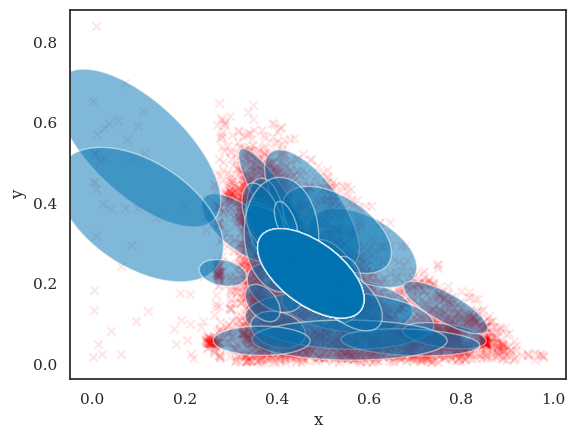

In [19]:
def make_ellipses(gmm, ax, i, j):
    # for n, color in enumerate(colors):
    for cov, means, weight in zip(gmm.covariances_, gmm.means_, gmm.weights_):
        # if weight <= 0.01:
        #     continue
        
        cov = extract_covariance(cov, i, j)
        means = means[[i, j]]

        v, w = np.linalg.eigh(cov)
        u = w[0] / np.linalg.norm(w[0])

        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees

        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        ell = mpl.patches.Ellipse(
            means, v[0], v[1], angle=180 + angle,  # color=color
        )
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        # ax.set_aspect("equal", "datalim")


fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X_train[:, 0], X_train[:, 1], alpha=0.1, color="red", marker="x")
ax.set_xlabel("x")
ax.set_ylabel("y")

make_ellipses(gmm, ax, 0, 1)

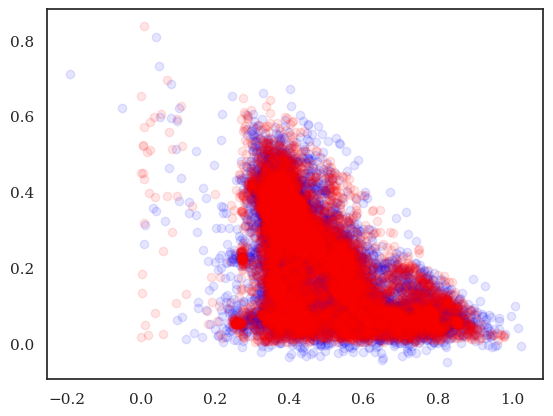

In [20]:
X_gen, _ = gmm.sample(10000)

plt.scatter(X_gen[:, 0], X_gen[:, 1], color="blue", alpha=0.1)
plt.scatter(X_train[:, 0], X_train[:, 1], color="red", marker="o", alpha=0.1)

In [21]:
import seaborn as sns

def plot_kde(season: str, X_gen, X_train):
    fig, axes = plt.subplots(
        nrows=1, ncols=3, figsize=(18, 6), tight_layout=True)
    fig.suptitle(season)

    for i, value in enumerate(["Arrival", "Duration", "Demand"]):
        ax = sns.kdeplot(X_gen[:, i], label="generated", fill=True, ax=axes[i])
        ax = sns.kdeplot(
            X_train[:, i], label="training", fill=True, ax=axes[i])

        # ax.set_aspect("equal", "datalim")
        ax.set_ylim(bottom=0)
        ax.set_xlim(-2, 2)

        ax.set_xlabel(value)
        ax.set_ylabel("Density")
        # ax.set_title(value)
        ax.legend()

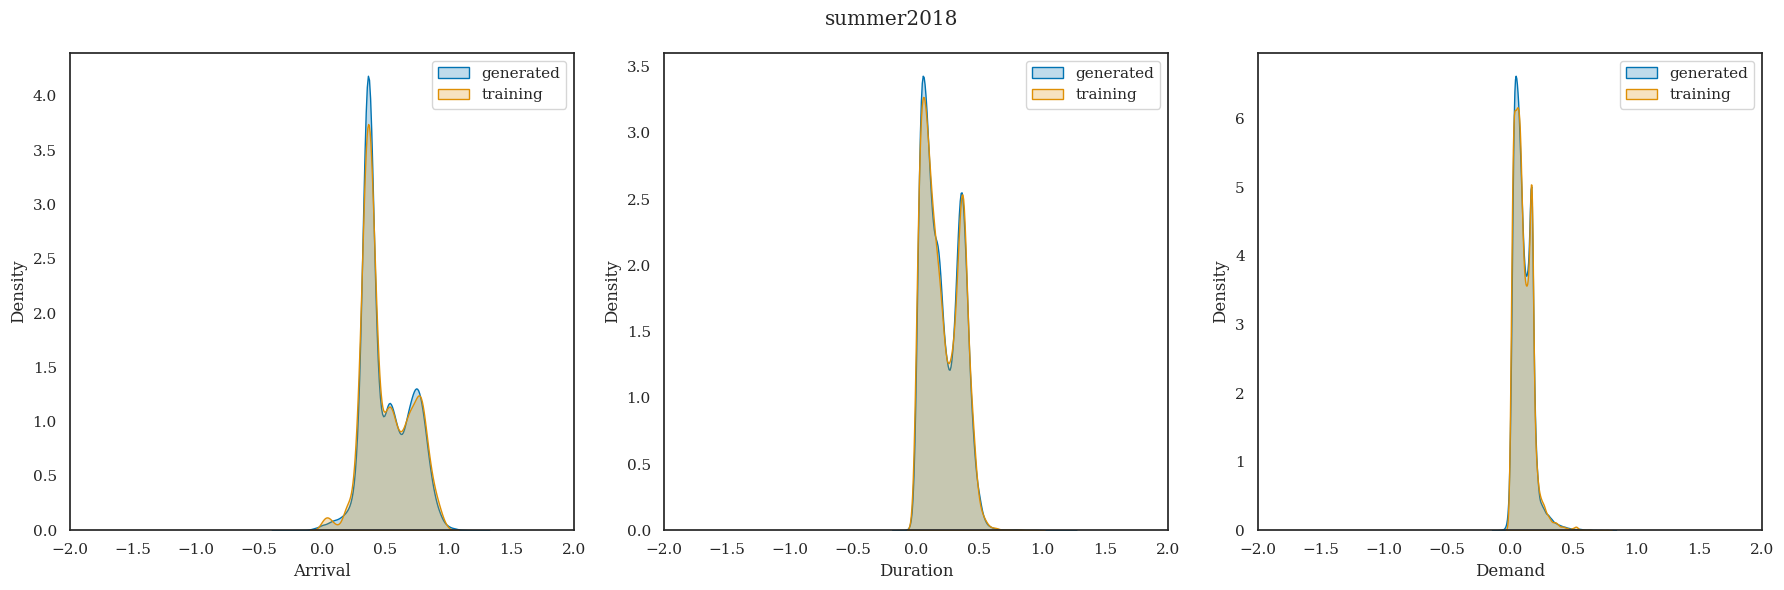

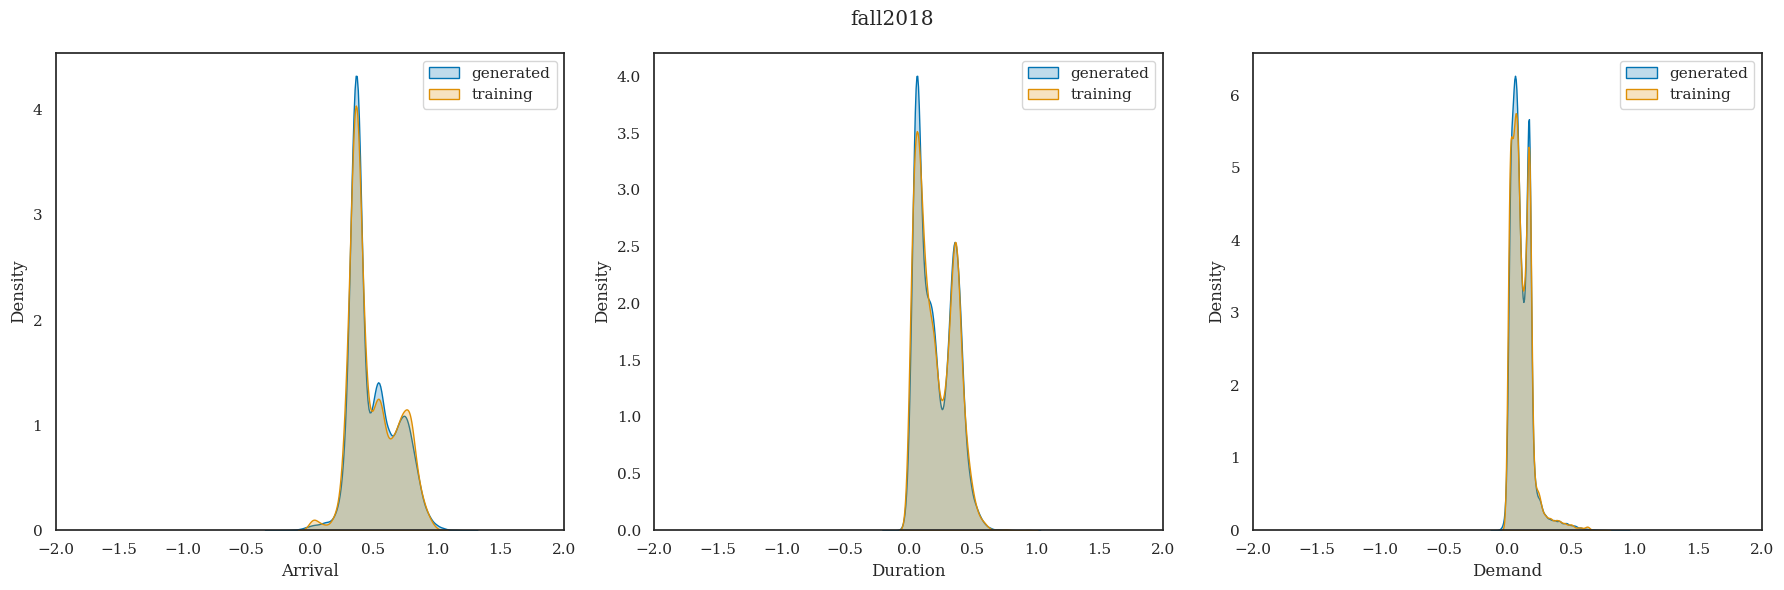

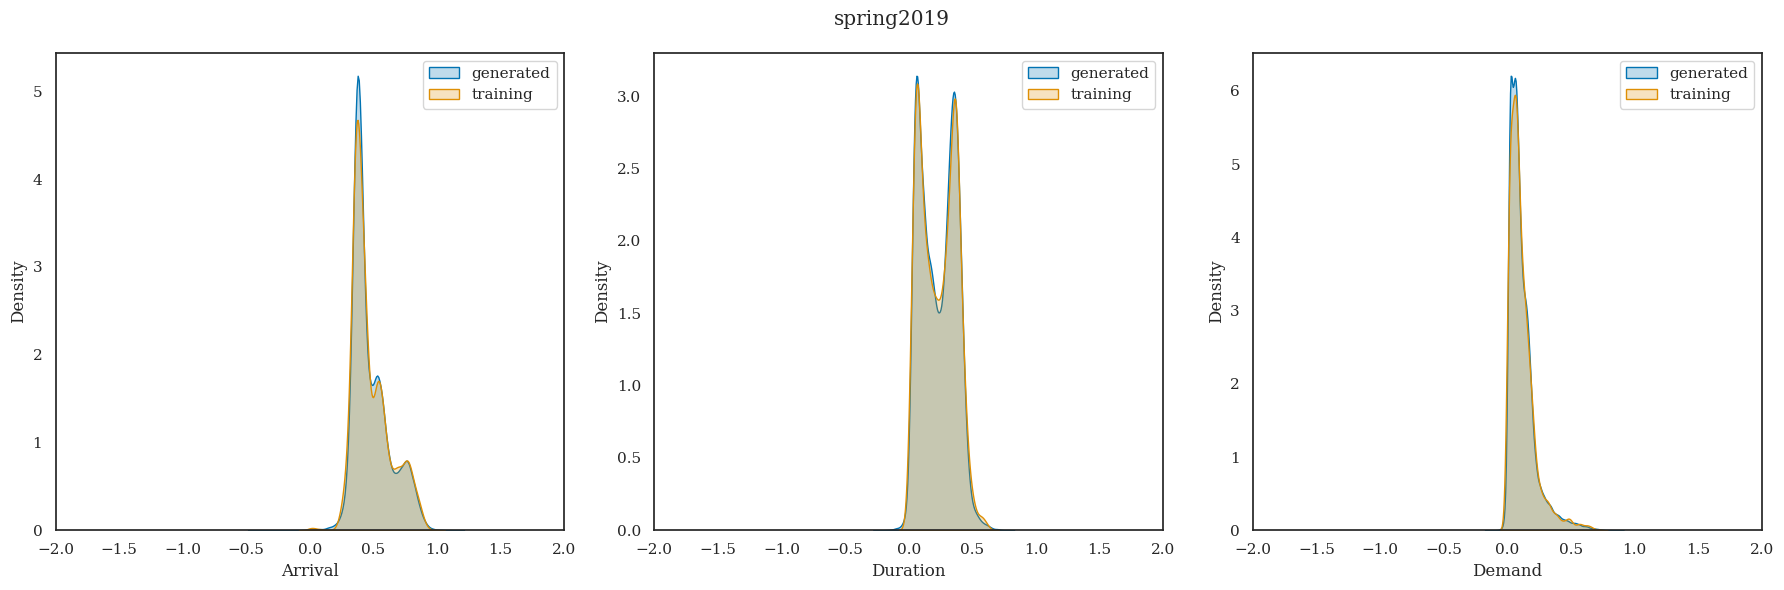

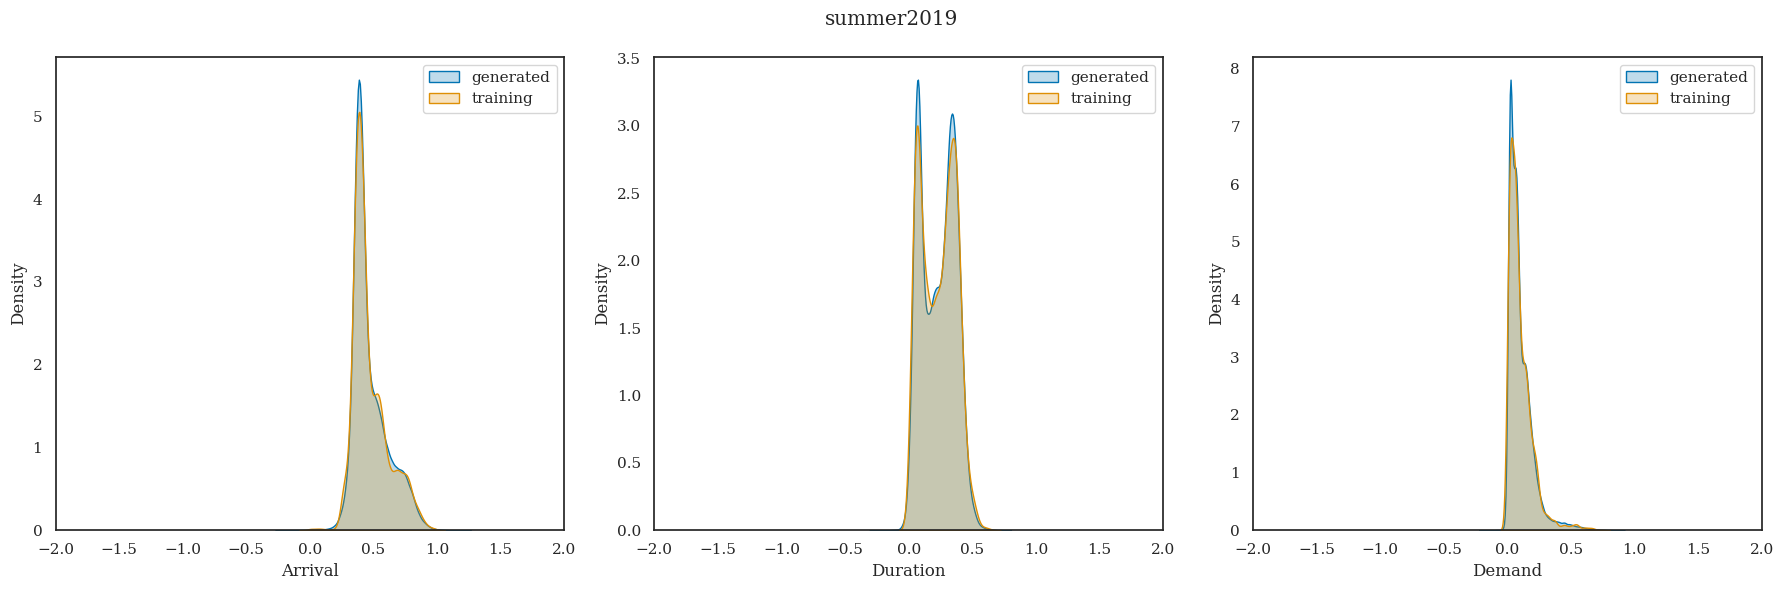

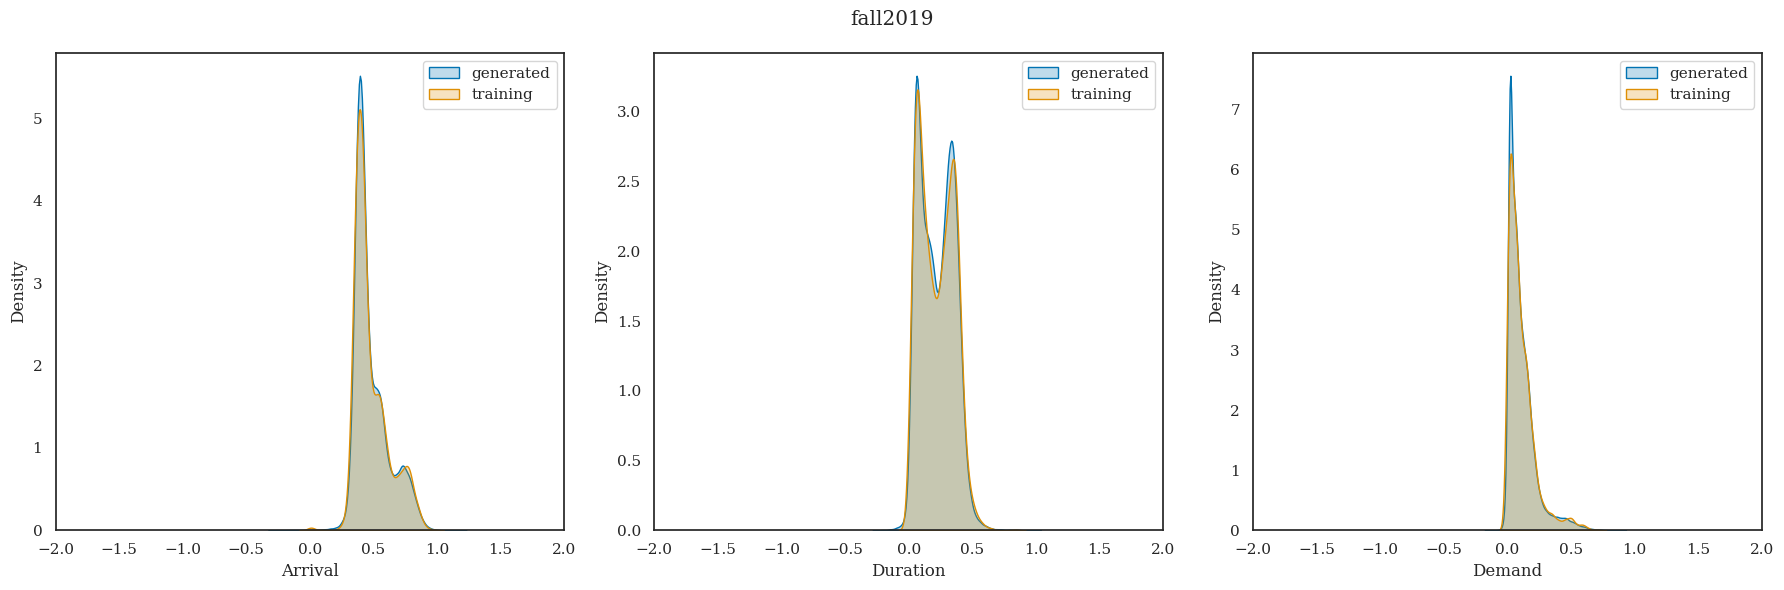

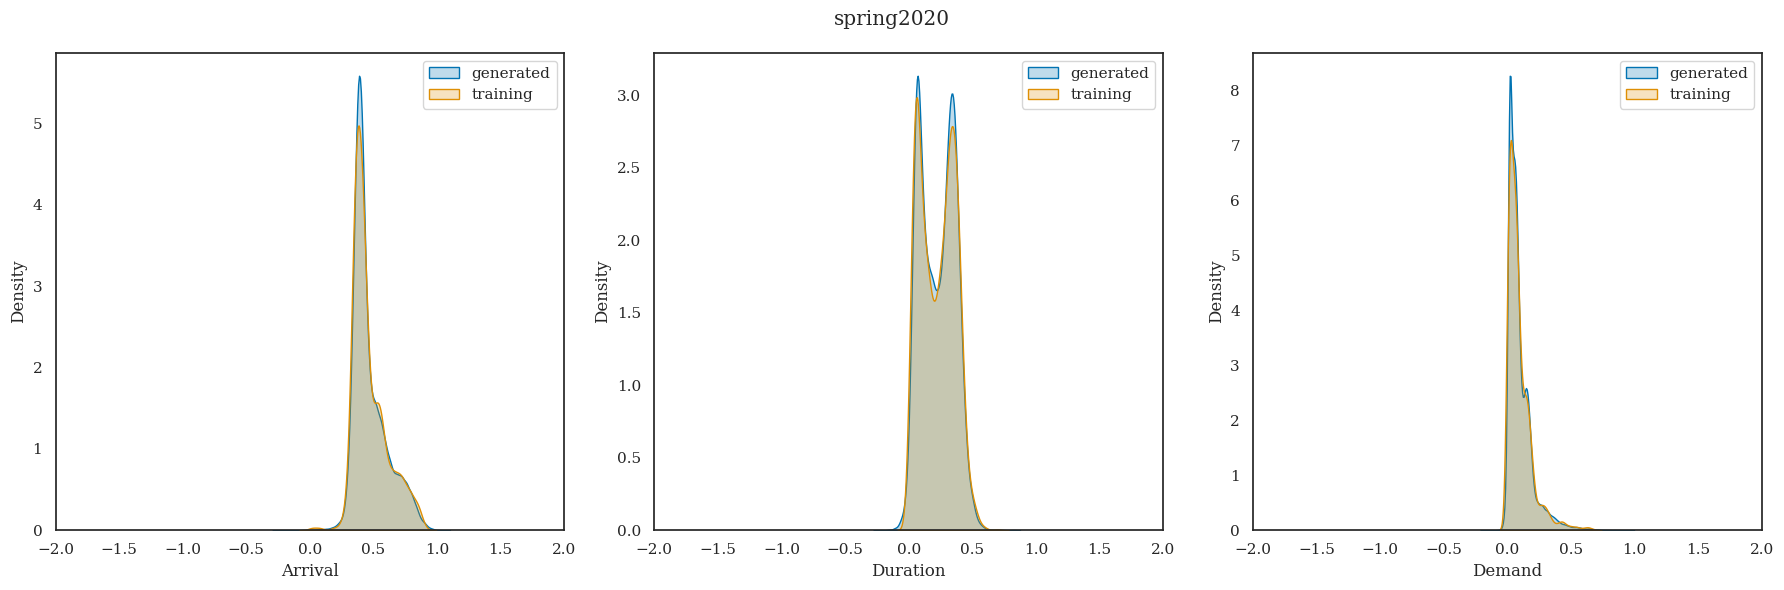

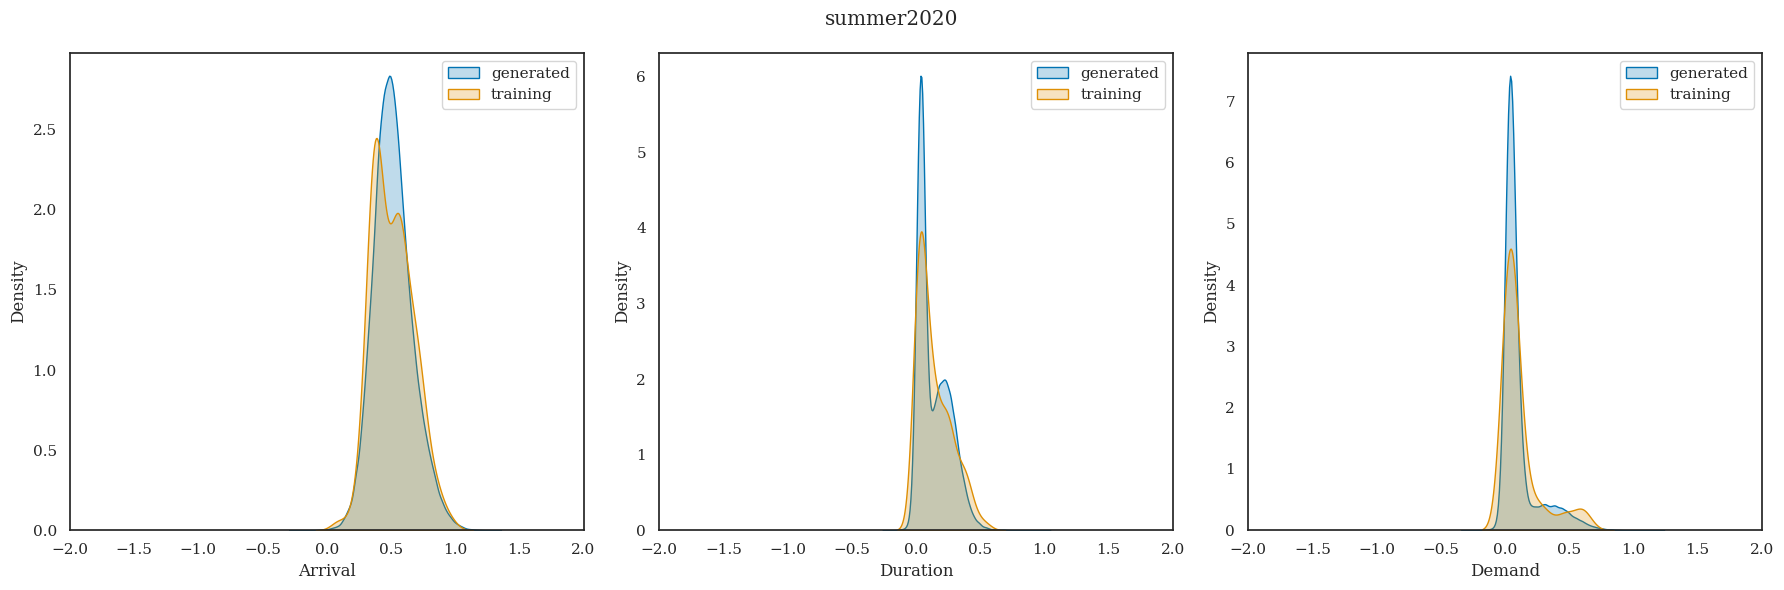

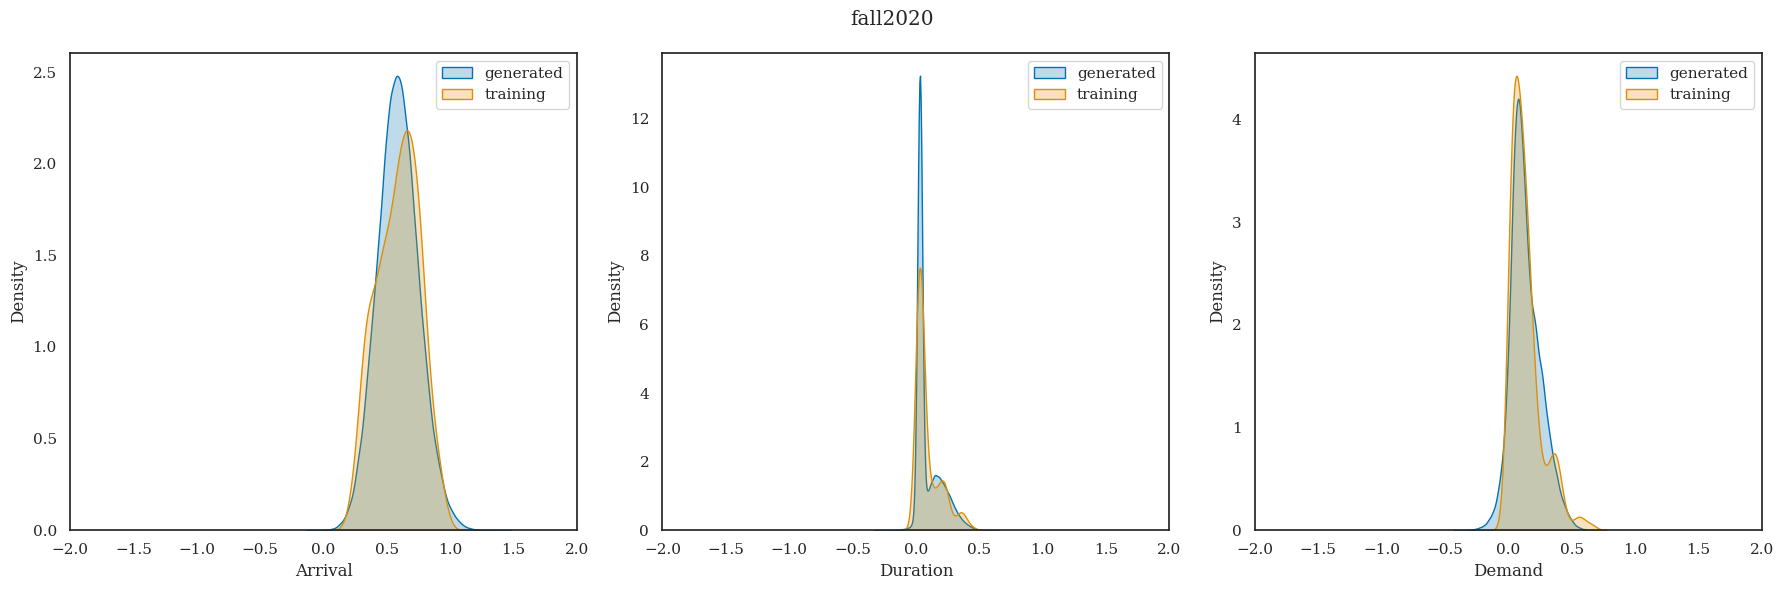

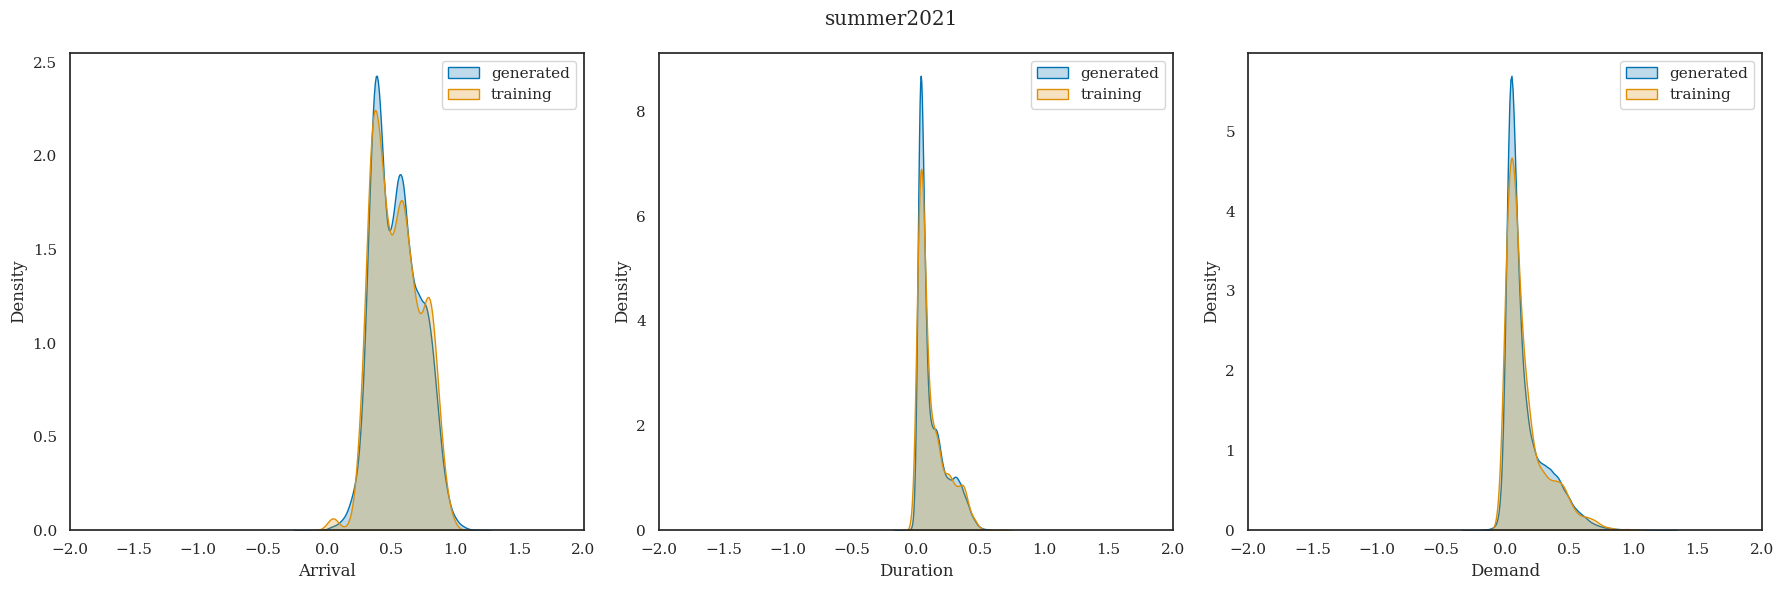

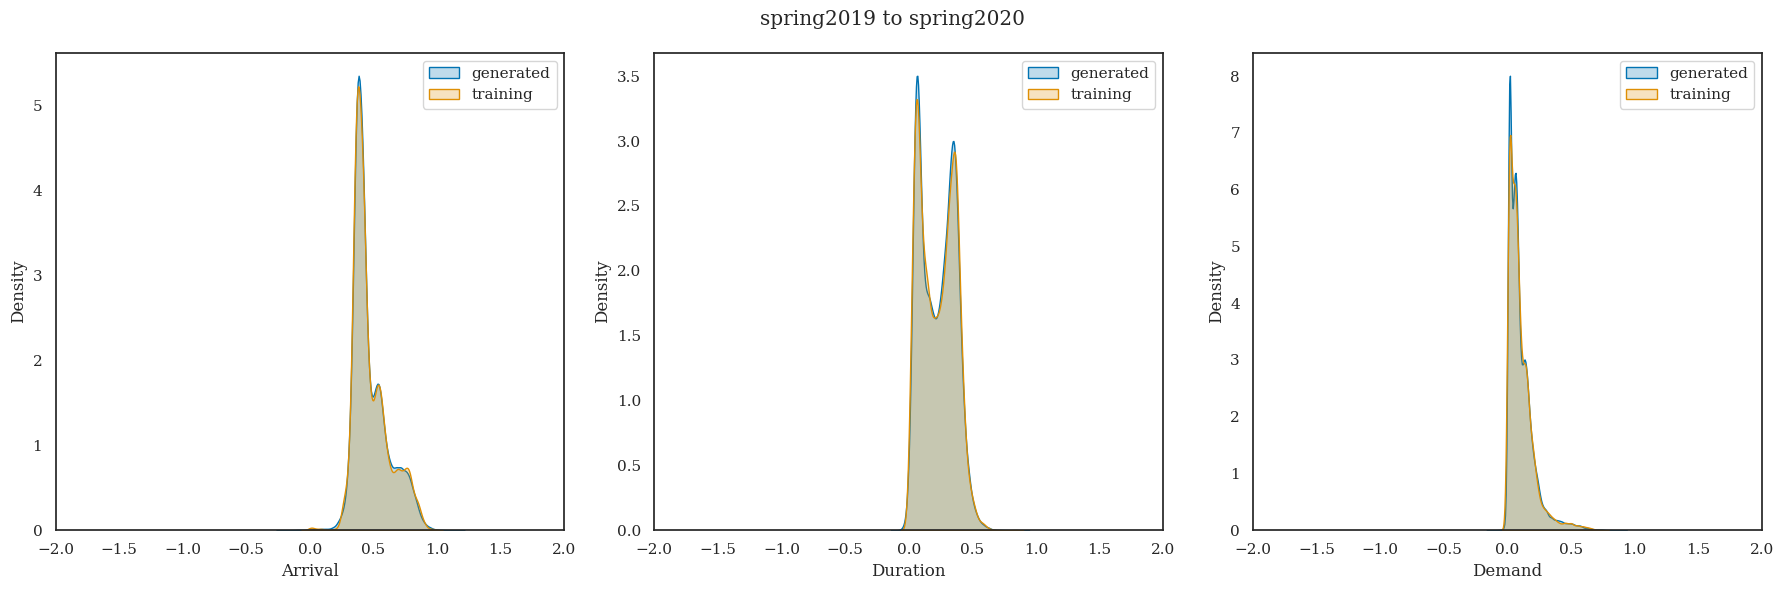

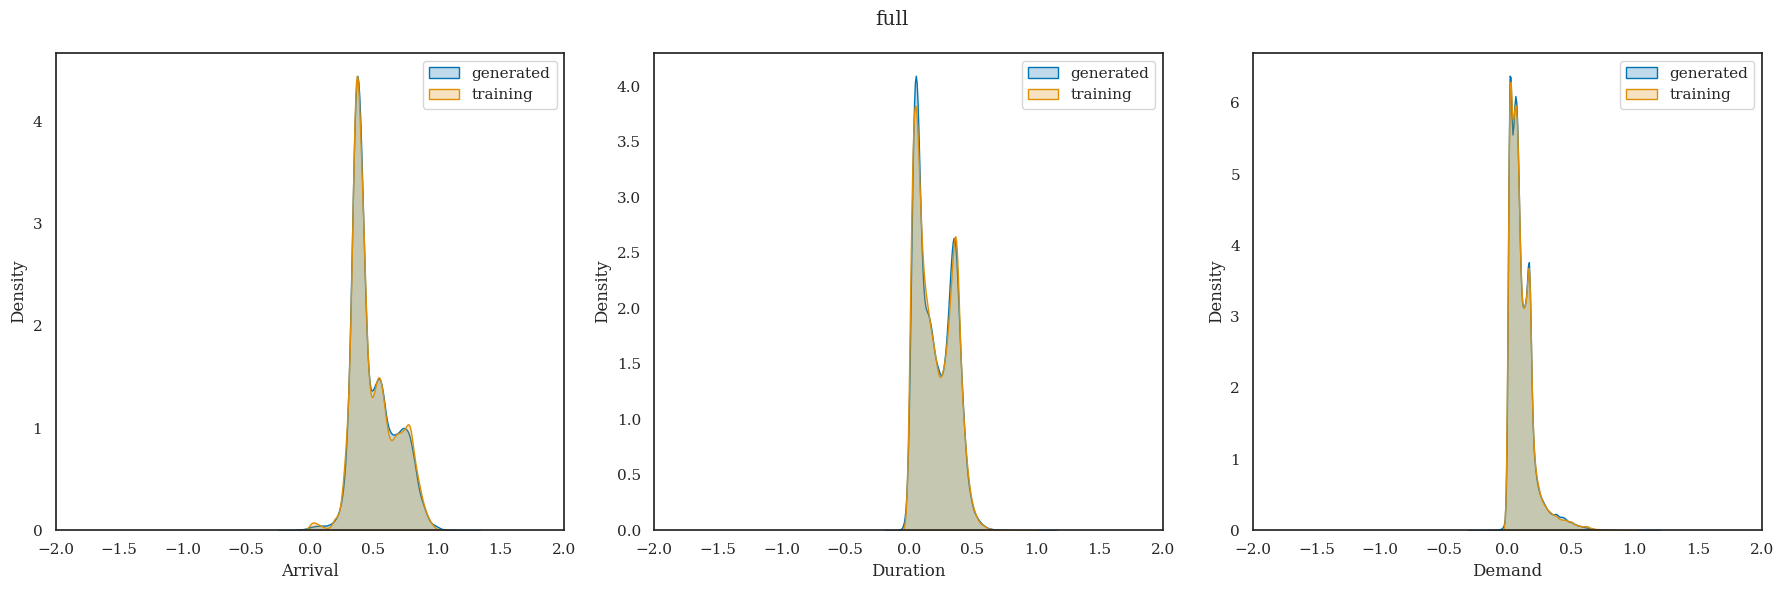

In [22]:
for season in data.keys():
    X_gen, _ = gmms[season][0].sample(100000) 
    X_train = gmms[season][1].transform(data[season][1])

    plot_kde(season, X_gen, X_train)

In [23]:
# from itertools import product
# import scipy

# results = {}
# fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 8), tight_layout=True)

# for i, feature in enumerate(["arrival", "departure", "demand"]):
#     # results[feature] = {}
#     results = {}
#     for (season_a, X_a), (season_b, X_b) in product(data.items(), data.items()):
#         v = 1 - scipy.stats.ks_2samp(X_a[:, i], X_b[:, i], method="exact").pvalue#.statistic#.pvalue
#         # results[feature][f"{season_a} vs {season_b}"] = v
#         results.setdefault(season_a, {})

#         results[season_a][season_b] = v

#     # , columns=results.keys())
#     df = pd.DataFrame.from_dict(results, orient='index')
#     sns.heatmap(df, annot=True, ax=axes[i], fmt=".2g",cmap="coolwarm_r", square=False)

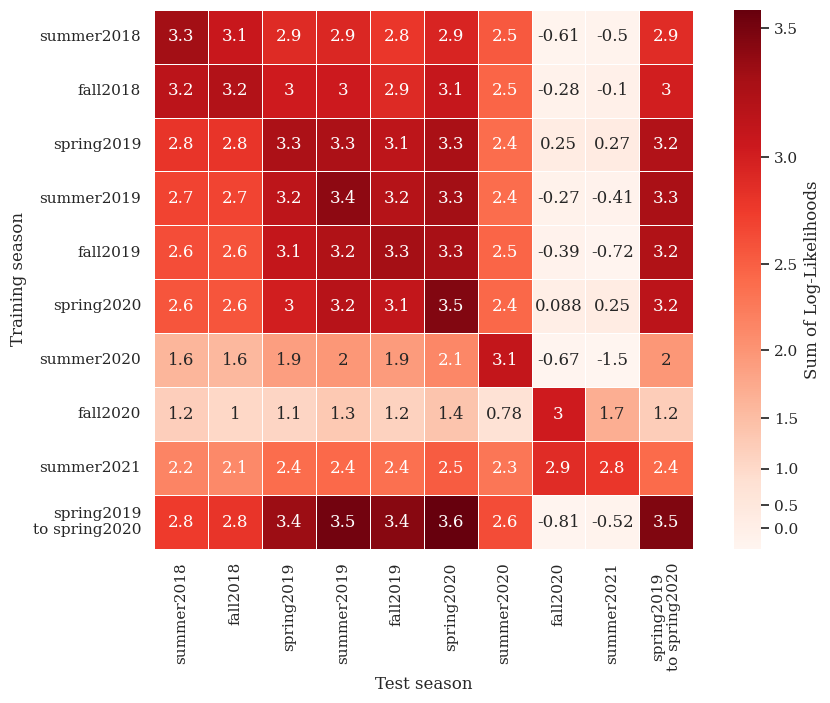

In [24]:

from matplotlib.colors import LogNorm, PowerNorm


results = {}
for train_season, (gmm, scaler) in gmms.items():
    results[train_season] = {}  # Each GMM gets a dictionary for seasons
    for season in data.keys():
        _, X = data[season]
        X = scaler.transform(X)
        # results[key][season] = np.exp(gmm.score(X))
        results[train_season][season] = gmm.score(X)

# results["spring2019\n to spring2020"] = results["spring2019 to spring2020"]

df = pd.DataFrame.from_dict(results, orient='index', columns=results.keys())
df.index = df.index.str.replace(r'^(\S+)\s+(\S+\s+\S+)$', r'\1\n\2', regex=True)
df.columns = df.columns.str.replace(r'^(\S+)\s+(\S+\s+\S+)$', r'\1\n\2', regex=True)
df.drop(columns=["full"], inplace=True)
df.drop(index=["full"], inplace=True)

m = 3.5
plt.figure(figsize=(3 * m, 2 * m))
sns.heatmap(df, annot=True, cmap="Reds",  linewidths=0.5, fmt=".2g", square=True,
            norm=PowerNorm(gamma=np.e), cbar_kws={"ticks": np.arange(0, 4, 0.5), "label": "Sum of Log-Likelihoods"}) #[0, 1, 2, 3, 3.5]
# plt.title("Sum of Log-Likelihood")
plt.xlabel("Test season")
plt.ylabel("Training season")
# plt.xticks(rotation=45)
plt.savefig("gmm_heatmap.pdf", dpi=300, bbox_inches = "tight")
plt.show()

In [25]:
with open("triple_gmm+sc.pkl", "wb") as f:
    pickle.dump(gmms["spring2019 to spring2020"], f)